# CUNY D620 - Web Analytics

## HW3 - Graph Visualization - 9/15/18

### Kyle Gilde

In order to some some exporatory data analysis on network data, let's load the required packages.


In [175]:
import networkx as nx
from networkx.algorithms import traversal
from networkx import algorithms
import matplotlib.pyplot as plt

## 1. Introduction

We have downloaded the facebook.tar.gz file from [Stanford's](https://snap.stanford.edu/data/ego-Facebook.html) network analysis data site and have imported the edge list from the file called '0.edges'. 

These data were collected using a Facebook app and were used in the following research paper.

J. McAuley and J. Leskovec. [Learning to Discover Social Circles in Ego Networks](http://i.stanford.edu/~julian/pdfs/nips2012.pdf). NIPS, 2012.


In [55]:
G = nx.read_edgelist('0.edges')

The edge list contains 333 distinct nodes and 2519 edges, which are single relationships. These are also called dyads and are the basic unit of Social Network Analysis (SNA).

In [15]:
print(G.number_of_nodes(), G.number_of_edges())

333 2519


This particular edge list does not contain additional attributes or weights.

In [176]:
list(G.edges(data=True))[1:10], list(G.nodes(data=True))[1:10]

([('236', '84', {}),
  ('236', '62', {}),
  ('236', '142', {}),
  ('236', '252', {}),
  ('236', '169', {}),
  ('236', '280', {}),
  ('236', '257', {}),
  ('236', '297', {}),
  ('236', '303', {})],
 [('186', {}),
  ('122', {}),
  ('285', {}),
  ('24', {}),
  ('346', {}),
  ('271', {}),
  ('304', {}),
  ('176', {}),
  ('9', {})])

## 2. Graphs & Metrics

The following graph shows that the nearly all of the nodes are interconnected. We just see a handful of small subgraphs.

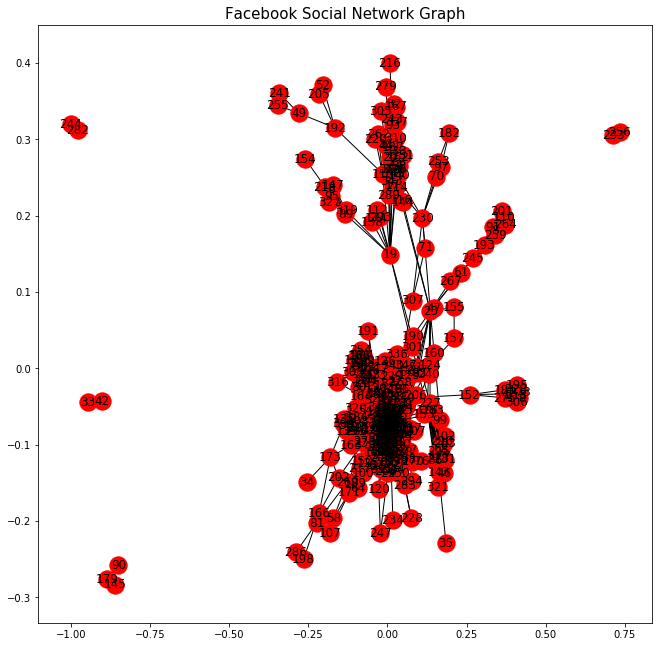

In [173]:
plt.figure(figsize=(11, 11))
nx.draw_networkx(G)
#nx.draw(G)
plt.title('Facebook Social Network Graph', size=15)
plt.show()

If we try to find the shortest path between nodes '35' and '256,' Python returns an error indicating that they are not connected.

In [113]:
try: 
    print(algorithms.shortest_path(G, '35', '256'))
except Exception as e:
    print(e)

No path between 35 and 256.


However, nodes '233' and '256' are connected.

In [116]:
try: 
    print(algorithms.shortest_path(G, '233', '256'))
except Exception as e:
    print(e)

['233', '256']


In the next set of graphs, we can see can take a closer look at the 5 subgraphs of this disconnected graph. All but 9 of the 333 nodes are connected.

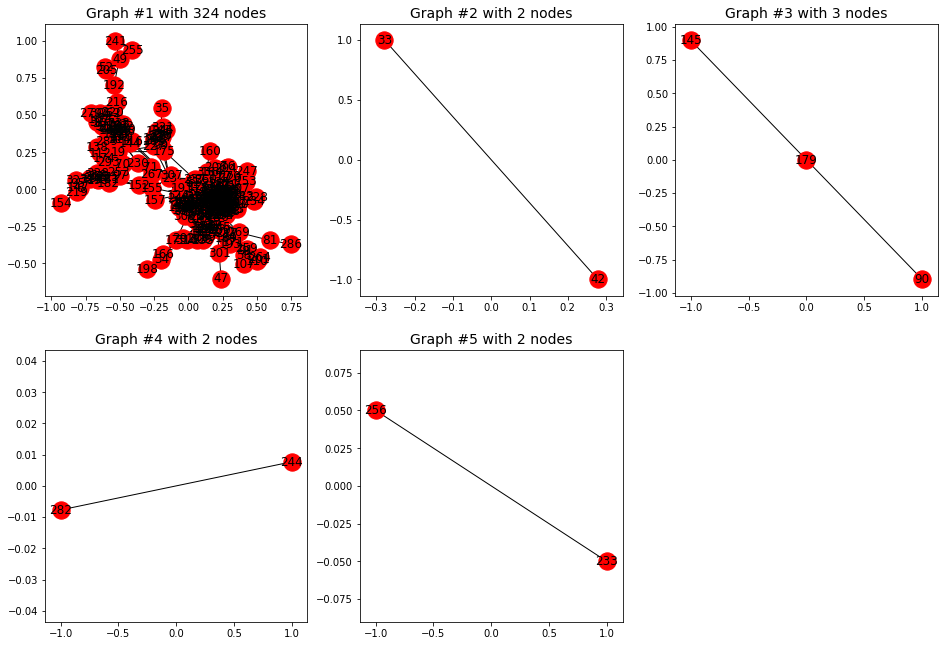

In [168]:
graphs = list(nx.connected_component_subgraphs(G))

plt.figure(figsize=(16, 11))
for i, graph in enumerate(graphs):
    
    plt.subplot(2, 3, i + 1)
    nx.draw_networkx(graph)
    title = 'Graph #' + str(i + 1) + " with " + str(len(graph)) + ' nodes'
    plt.title(title, size=14)
plt.show()

In the largest subgraph, the average shortest length between the nodes is 3.8.

In [167]:
largest_subgraph = max(graphs, key=len)
round(algorithms.average_shortest_path_length(largest_subgraph), 1)

3.8

Within the largest subgraph, the diameter, which is maximum distance between two nodes, is 11.

In [171]:
nx.diameter(largest_subgraph)

11

## 3. Traversals

The next graph shows a depth-first traveral, which means that the child nodes are visited before each of the sibling nodes.

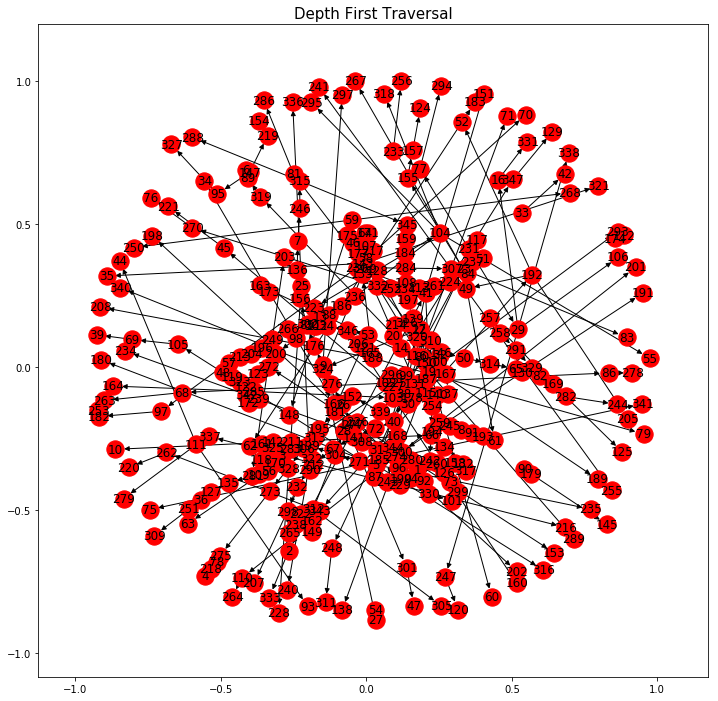

In [174]:
plt.figure(figsize=(11, 11))
tree_dfs = traversal.dfs_tree(G)
nx.draw_networkx(tree)
plt.title('Depth First Traversal', size=15)
plt.show()

The final graph shows a breadth-first traveral, which means that the sibling nodes are visited before the child nodes.

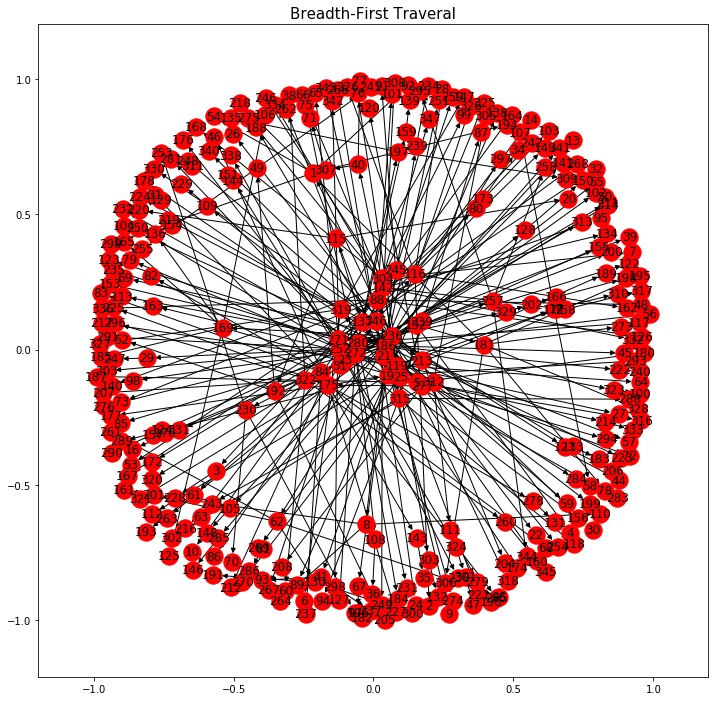

In [89]:
plt.figure(figsize=(11, 11))
tree_bfs = traversal.bfs_tree(G, '236')
nx.draw_networkx(tree_bfs)
plt.title('Breadth-First Traveral', size=15)
plt.show()

## Sources:

[Graph Optimization with NetworkX in Python](https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial), Datacamp.com

[NetworkX: connected_component_subgraphs](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html)
